# 分析結果のあれこれ

In [2]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 63.5 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=a147df5297af7973bc0be53c13a73c155a891abb4e708c6fa679fc0d68eede3d
  Stored in directory: /home/ec2-user/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [41]:
import os
import re
import csv
import pandas as pd
from glob import glob
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

関数を定義

In [37]:
def extract_filename_without_extension(filepath):
    # ファイルパスの最後の要素（ファイル名）を取得
    filename = os.path.basename(filepath)

    # ファイル名から拡張子を除去
    filename_without_extension = os.path.splitext(filename)[0]

    return filename_without_extension


def analysis_anomaly_df(result_path, output_path):
    dir_area = extract_filename_without_extension(output_path)

    # 異常検出結果を読み込む
    df = pd.read_csv(result_path)

    # 異常検出結果を標準出力する
    # 表示が不要な場合は、コメントアウトする
    log_path = f"output/EDA_result/{dir_area}_log.csv"
    image_list = sorted(df['image_name'].unique())

    data = [
        [f"線区フォルダ名: {dir_area}", "", "", ""],
        [f"対象画像：{len(image_list)}枚", "", "", ""],
        ["画像ファイル名", "Twins電柱番号", "異常_開始キロ程", "異常_終了キロ程"]
    ]

    with open(log_path, "w", newline='', encoding='shift-jis') as file:
        writer = csv.writer(file)
        for image_name in image_list:
            # print(f"{image_name} >>> キロ程範囲 {df[df['image_name'] == image_name]['kiro_tei'].min()} ～ {df[df['image_name'] == image_name]['kiro_tei'].max()}\n")
            data.append([
                f"{image_name}",
                int(df[df['image_name'] == image_name]['pole_num'].unique()[0]),
                df[df['image_name'] == image_name]['kiro_tei'].min(),
                df[df['image_name'] == image_name]['kiro_tei'].max()
            ])
        # データを一行ずつ書き込む
        for row in data:
            writer.writerow(row)
    print(f"異常検出結果を {log_path} に出力しました")

    # もとの解析結果を読み込む
    df_output = pd.read_csv(output_path)

    # 異常検出結果があるかを基のデータフレームに追記する
    df_output['Anomaly'] = False
    # df_output の ix 列の値が df の ix 列のいずれかの値と一致する場合、Anomaly を True に設定
    df_output.loc[df_output['ix'].isin(df['ix']), 'Anomaly'] = True

    # グラフを出力する
    create_graph(df, df_output, output_path)


def create_graph(df, df_output, output_path):
    dir_area = extract_filename_without_extension(output_path)

    # フォントサイズ変更
    plt.rcParams["font.size"] = 18

    # プロットの作成
    plt.figure(figsize=(20, 8))  # グラフのサイズを設定

    # estimated_width の線グラフをプロット
    plt.plot(df_output['kiro_tei'], df_output['estimated_width'], label='Estimated Width')

    # Anomaly が True の点を赤丸でプロット
    anomalies = df_output[df_output['Anomaly'] == True]
    plt.scatter(anomalies['kiro_tei'], anomalies['estimated_width'], color='red', s=50, label='Anomaly')

    # グラフの設定
    plt.xlabel('キロ程(km)')
    plt.ylabel('画像におけるトロリ線摺動面幅(px)')
    plt.title(f'摺動面幅での異常検出結果: {dir_area}')
    plt.legend()

    # グリッドの追加
    plt.grid(True, linestyle='--', alpha=0.7)

    # x軸の目盛りを調整（必要に応じて）
    plt.xticks(rotation=45)

    # グラフのレイアウトを調整
    plt.tight_layout()

    # グラフを画像として保存
    save_path = f'output/EDA_result/{dir_area}_width.png'
    plt.savefig(save_path)
    print(f"グラフを {save_path} に出力しました")

    # グラフを表示
    plt.show()

print("準備OK")

準備OK


対象のファイルを指定する

In [61]:
# ファイルリストを取得し、ソート
file_list = sorted(glob("output/*.csv"))

# 結果ファイルと異常摩耗検出のファイルを分類
output_list = [fpath for fpath in file_list if "result" not in fpath]
result_list = [fpath for fpath in file_list if "result" in fpath]

print("ファイルパス")
print(f"画像→摺動面 検出結果 ファイル数: {len(output_list)}")
pprint(output_list)
print("---")
print(f"異常摩耗 検出結果 ファイル数: {len(result_list)}")
pprint(result_list)
print("---")

ファイルパス
画像→摺動面 検出結果 ファイル数: 11
['output/Joban_001_Toride-st_down_20240402_day_HD21_output.csv',
 'output/Joban_001_Toride-st_down_20240402_day_HD22_output.csv',
 'output/Joban_001_Toride-st_up_20240402_day_HD21_output.csv',
 'output/Joban_001_Toride-st_up_20240402_day_HD22_output.csv',
 'output/Joban_002_Toride-Fujishiro_down_20240402_day_HD21_output.csv',
 'output/Joban_002_Toride-Fujishiro_down_20240402_day_HD22_output.csv',
 'output/Joban_002_Toride-Fujishiro_up_20240402_day_HD21_output.csv',
 'output/Takasaki_19_Gyouda-Kumagaya_down_20240508_day_HD21_output.csv',
 'output/Takasaki_19_Gyouda-Kumagaya_down_20240508_day_HD22_output.csv',
 'output/Takasaki_19_Gyouda-Kumagaya_up_20240509_day_HD21_output.csv',
 'output/Takasaki_19_Gyouda-Kumagaya_up_20240509_day_HD22_output.csv']
---
異常摩耗 検出結果 ファイル数: 11
['output/result_HD21_Joban_001_Toride-st_down_20240402_day.csv',
 'output/result_HD21_Joban_001_Toride-st_up_20240402_day.csv',
 'output/result_HD21_Joban_002_Toride-Fujishiro_down_20240402

In [62]:
result_list[0]

'output/result_HD21_Joban_001_Toride-st_down_20240402_day.csv'

In [63]:
def extract_info(file_path):
    # より汎用的な正規表現パターンを定義
    pattern = r'output/result_HD\d+_(.*?)\.csv'

    # パターンにマッチする部分を抽出
    match = re.search(pattern, file_path)

    if match:
        # マッチした部分（グループ1）を返す
        return match.group(1)
    else:
        # マッチしない場合はNoneを返す
        return None

dir_list = []
for result_path in result_list:
    dir_list.append(extract_info(result_path))
dir_list = sorted(list(set(dir_list)))

print("異常摩耗検出結果がある線区名👇")
pprint(dir_list)

異常摩耗検出結果がある線区名👇
['Joban_001_Toride-st_down_20240402_day',
 'Joban_001_Toride-st_up_20240402_day',
 'Joban_002_Toride-Fujishiro_down_20240402_day',
 'Joban_002_Toride-Fujishiro_up_20240402_day',
 'Takasaki_19_Gyouda-Kumagaya_down_20240508_day',
 'Takasaki_19_Gyouda-Kumagaya_up_20240509_day']


In [155]:
# メモ用、いずれは自動処理にする？
# 解析した線区名・カメラ番号のリスト
[
    ["Joban_001_Toride-st_down_20240402_day", "HD21"],
    ["Joban_001_Toride-st_down_20240402_day", "HD22"],
    ["Joban_001_Toride-st_up_20240402_day", "HD21"],
    ["Joban_001_Toride-st_up_20240402_day", "HD22"],
    ["Joban_002_Toride-Fujishiro_down_20240402_day", "HD21"],
    ["Joban_002_Toride-Fujishiro_down_20240402_day", "HD22"],
    ["Joban_002_Toride-Fujishiro_up_20240402_day", "HD21"],
    # ["Takasaki_19_Gyouda-Kumagaya_down_20240508_day", "HD21"]    # Result がおかしい
    ["Takasaki_19_Gyouda-Kumagaya_up_20240509_day", "HD21"],
    ["Takasaki_19_Gyouda-Kumagaya_up_20240509_day", "HD22"]
]

[['Joban_001_Toride-st_down_20240402_day', 'HD21'],
 ['Joban_001_Toride-st_down_20240402_day', 'HD22'],
 ['Joban_001_Toride-st_up_20240402_day', 'HD21'],
 ['Joban_001_Toride-st_up_20240402_day', 'HD22'],
 ['Joban_002_Toride-Fujishiro_down_20240402_day', 'HD21'],
 ['Joban_002_Toride-Fujishiro_down_20240402_day', 'HD22'],
 ['Joban_002_Toride-Fujishiro_up_20240402_day', 'HD21']]

## 異常摩耗の検出結果とグラフを作成する

In [64]:
# dir_area = "Joban_001_Toride-st_down_20240402_day"
# dir_area = "Joban_001_Toride-st_up_20240402_day"
# dir_area = "Joban_002_Toride-Fujishiro_down_20240402_day"
# dir_area = "Joban_002_Toride-Fujishiro_up_20240402_day"
dir_area = "Takasaki_19_Gyouda-Kumagaya_down_20240508_day"
# dir_area = "Takasaki_19_Gyouda-Kumagaya_up_20240509_day"
camera_num = "HD22"

output_key = f"{dir_area}_{camera_num}"
resulut_key = f"{camera_num}_{dir_area}"

output_path = [fpath for fpath in output_list if output_key in fpath]
result_path = [fpath for fpath in result_list if resulut_key in fpath]
print("👇リストが空の場合は、線区・カメラ番号を指定しなおす")
print(f"{output_path=}")
print(f"{result_path=}")

👇リストが空の場合は、線区・カメラ番号を指定しなおす
output_path=['output/Takasaki_19_Gyouda-Kumagaya_down_20240508_day_HD22_output.csv']
result_path=['output/result_HD22_Takasaki_19_Gyouda-Kumagaya_down_20240508_day.csv']


異常検出結果を output/EDA_result/Takasaki_19_Gyouda-Kumagaya_down_20240508_day_HD22_output_log.csv に出力しました


/tmp/ipykernel_30409/2632824840.py:2: DtypeWarning:

Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.



グラフを output/EDA_result/Takasaki_19_Gyouda-Kumagaya_down_20240508_day_HD22_output_width.png に出力しました


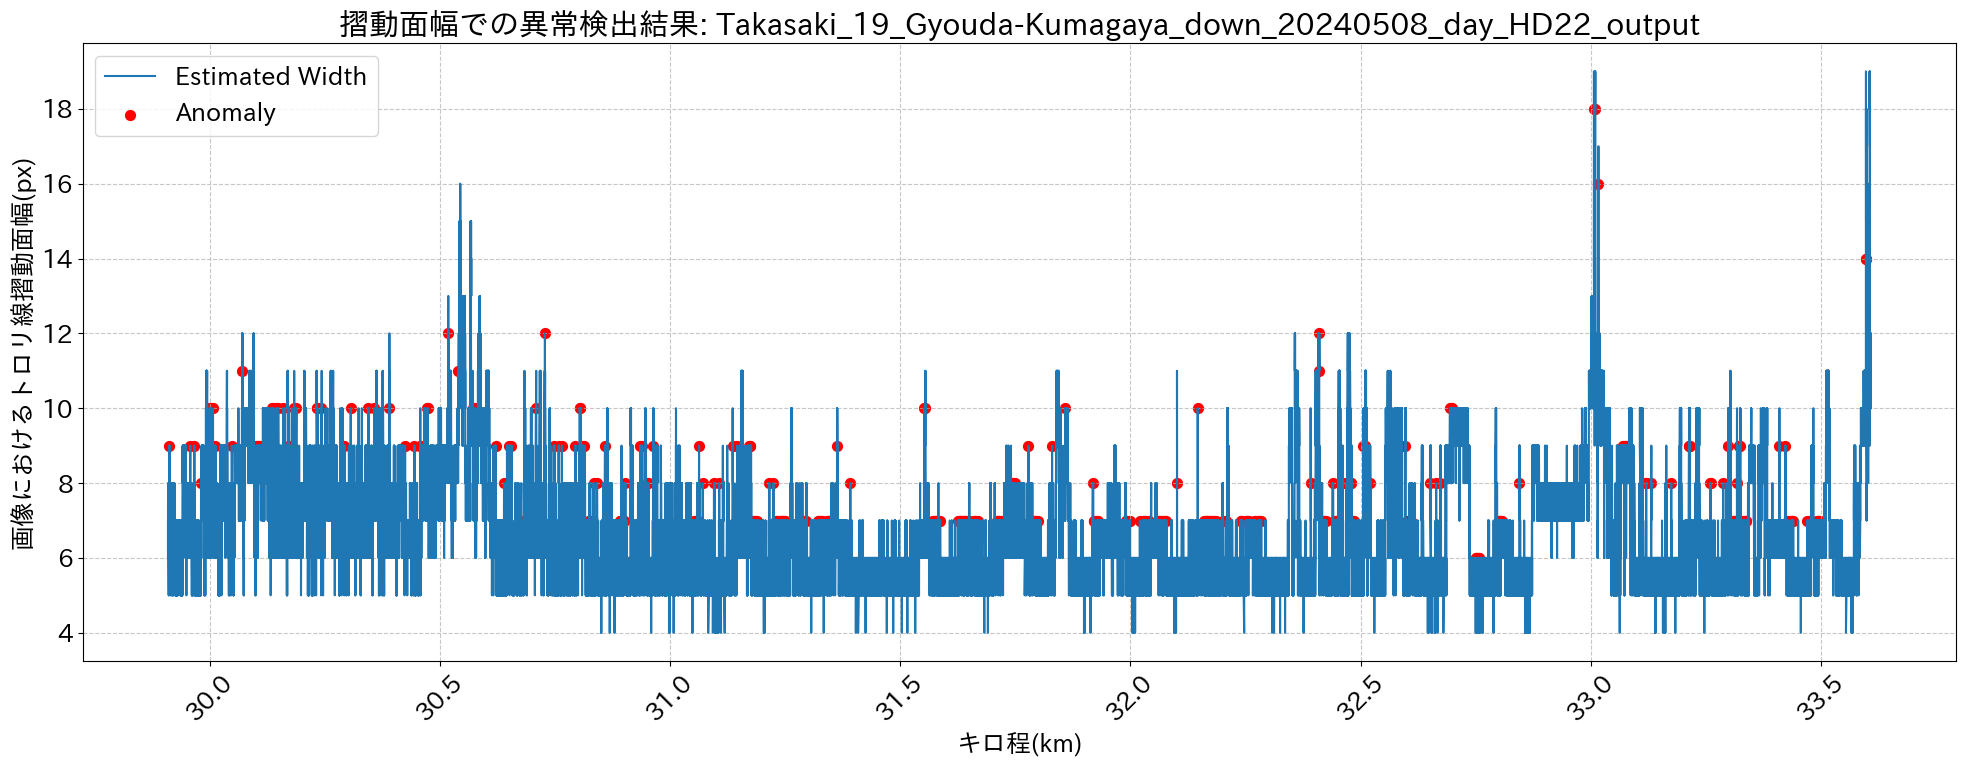

In [65]:
# ファイルパスを指定してグラフ化する
analysis_anomaly_df(result_path[0], output_path[0])

# (摩耗台帳チェック用)HD21,HD22を結合
対象ファイルが無い場合はエラーになります<br />
(例)HD21 と HD22 の両方の結果が無い　等

In [66]:
eda_results = sorted(glob("output/EDA_result/*.csv"))
eda_results = [path.replace("output/EDA_result/", "") for path in eda_results]
eda_results = [path.replace("_output_log.csv", "") for path in eda_results]
eda_results

['Joban_001_Toride-st_down_20240402_day_HD21',
 'Joban_001_Toride-st_down_20240402_day_HD22',
 'Joban_001_Toride-st_down_20240402_day',
 'Joban_001_Toride-st_up_20240402_day_HD21',
 'Joban_001_Toride-st_up_20240402_day_HD22',
 'Joban_001_Toride-st_up_20240402_day',
 'Joban_002_Toride-Fujishiro_down_20240402_day_HD21',
 'Joban_002_Toride-Fujishiro_down_20240402_day_HD22',
 'Joban_002_Toride-Fujishiro_down_20240402_day',
 'Joban_002_Toride-Fujishiro_up_20240402_day_HD21',
 'Takasaki_19_Gyouda-Kumagaya_down_20240508_day_HD21',
 'Takasaki_19_Gyouda-Kumagaya_down_20240508_day_HD22',
 'Takasaki_19_Gyouda-Kumagaya_up_20240509_day_HD21',
 'Takasaki_19_Gyouda-Kumagaya_up_20240509_day_HD22',
 'Takasaki_19_Gyouda-Kumagaya_up_20240509_day']

In [67]:
def create_schema(file_list):
    schema = {}
    
    for file in file_list:
        # HDタグを抽出
        hd_tag = re.search(r'(HD\d+)$', file)
        
        # HDタグがある場合は、それを除いたキーを作成
        if hd_tag:
            key = file[:-(len(hd_tag.group()) + 1)]  # '_'も除く
            hd = hd_tag.group()
        else:
            key = file
            hd = None
        
        # キーが辞書に存在しない場合は新しいリストを作成
        if key not in schema:
            schema[key] = []
        
        # HDタグがある場合のみリストに追加
        if hd:
            schema[key].append(hd)
    
    # 重複を削除し、ソート
    for key in schema:
        schema[key] = sorted(list(set(schema[key])))
    
    return schema

eda_result_dict = create_schema(eda_results)
print('これまでに作成した異常値検出結果👇')
pprint(eda_result_dict)

これまでに作成した異常値検出結果👇
{'Joban_001_Toride-st_down_20240402_day': ['HD21', 'HD22'],
 'Joban_001_Toride-st_up_20240402_day': ['HD21', 'HD22'],
 'Joban_002_Toride-Fujishiro_down_20240402_day': ['HD21', 'HD22'],
 'Joban_002_Toride-Fujishiro_up_20240402_day': ['HD21'],
 'Takasaki_19_Gyouda-Kumagaya_down_20240508_day': ['HD21', 'HD22'],
 'Takasaki_19_Gyouda-Kumagaya_up_20240509_day': ['HD21', 'HD22']}


駅区間単位でのデータフレームを作成して、CSVで出力する

In [68]:
# 線区名・カメラ番号を指定
# dir_area = "Joban_001_Toride-st_down_20240402_day"
# dir_area = "Joban_001_Toride-st_up_20240402_day"
# dir_area = "Joban_002_Toride-Fujishiro_down_20240402_day"
# dir_area = "Takasaki_19_Gyouda-Kumagaya_up_20240509_day"
dir_area = "Takasaki_19_Gyouda-Kumagaya_down_20240508_day"
camera_nums = ["HD21", "HD22"]

# ひとつのデータフレームにまとめる
dfs = []
for camera_num in camera_nums:
    df_temp = pd.read_csv(f"output/EDA_result/{dir_area}_{camera_num}_output_log.csv", header=2, encoding="shift-jis")
    dfs.append(df_temp)
df = pd.concat(dfs, axis=0)

csv_path = f"output/EDA_result/{dir_area}_output_log.csv"
df.to_csv(csv_path, encoding="shift-jis", index=False)
print(f'HD21-HD22 を結合した結果を {csv_path} に出力しました')

HD21-HD22 を結合した結果を output/EDA_result/Takasaki_19_Gyouda-Kumagaya_down_20240508_day_output_log.csv に出力しました


# 作業用


グラフ化

In [5]:
df = pd.read_csv("output/Takasaki_19_Gyouda-Kumagaya_down_20240508_day_HD21_output.csv", encoding="utf-8")

idx_start = 1714
idx_end = 1744

df_filtered = df.query(f'image_idx >= {idx_start} & image_idx <= {idx_end}')

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
list(df_filtered['measurement_area'].iloc[:, ])[0]

'Takasaki_19_Gyouda-Kumagaya_down_20240508_day'

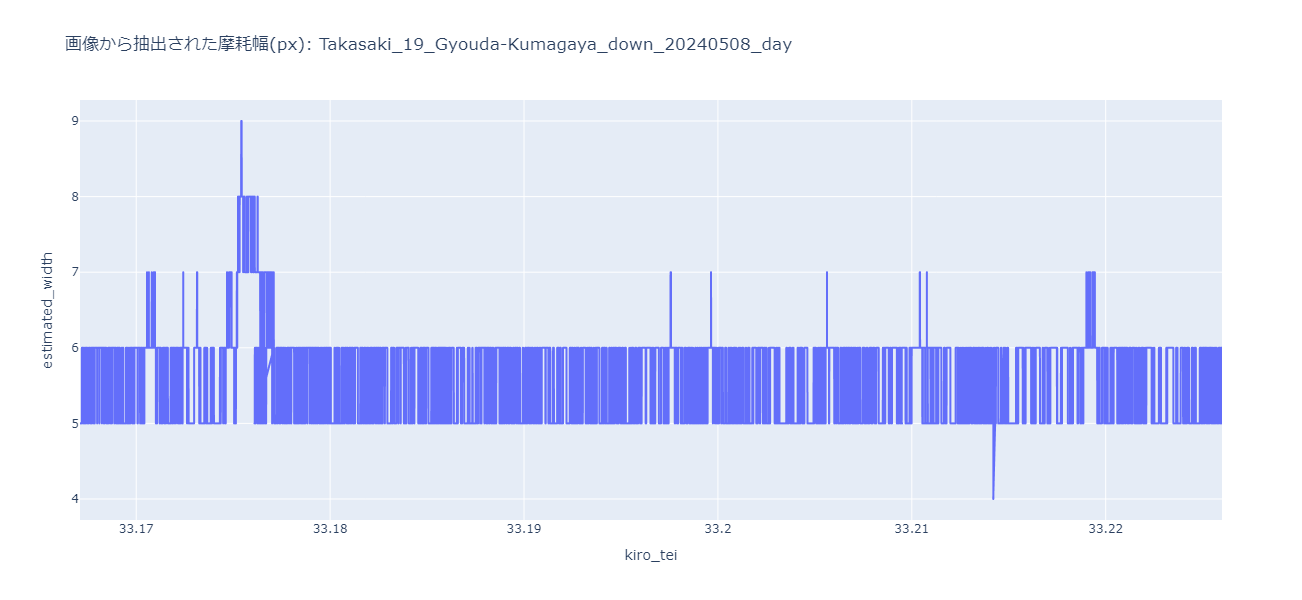

In [32]:
import pandas as pd
import numpy as np
import plotly.express as px


# 線区名を取得
dir_area_title = list(df_filtered['measurement_area'].iloc[:, ])[0]

# x軸とy軸に使用する列名を指定
x_column = 'kiro_tei'
y_column = 'estimated_width'

# Plotlyを使用して線グラフを作成
dir_area = list(df_filtered['measurement_area'].iloc[:, ])[0]
fig = px.line(
    df_filtered,
    x=x_column,
    y=y_column,
    title=f'画像から抽出された摩耗幅(px): {dir_area_title}',
    width=1200,
    height=600,
    hover_data={
        'estimated_width': True,
        'kiro_tei': True,
        'pole_num': True,
        'image_name': True,
        'estimated_width': True
    }
)

config = {'scrollZoom': True}

# グラフを表示
fig.show(config=config)

# グラフをHTMLファイルとして保存
fig.write_html("line_chart.html", config=config)

In [35]:
import pandas as pd
import numpy as np
import plotly.express as px


# 線区名を取得
dir_area_title = list(df_filtered['measurement_area'].iloc[:, ])[0]

# x軸とy軸に使用する列名を指定
x_column = 'kiro_tei'
y_column = 'estimated_width'

# 間引き感覚を指定
graph_thinout = 100

if graph_thinout != 1:
    labels = (df.index // graph_thinout)
    df_grp = df.groupby(labels).max()    # 間引き間隔での最大値を求める
    df_csv = df.reset_index(drop=True).copy()

# Plotlyを使用して線グラフを作成
dir_area = list(df_csv['measurement_area'].iloc[:, ])[0]
fig = px.line(
    df_csv,
    x=x_column,
    y=y_column,
    title=f'画像から抽出された摩耗幅(px): {dir_area_title}',
    width=1200,
    height=600,
    hover_data={
        'estimated_width': True,
        'kiro_tei': True,
        'pole_num': True,
        'image_name': True,
        'estimated_width': True
    }
)

config = {'scrollZoom': True}

# グラフを表示
# fig.show(config=config)

# グラフをHTMLファイルとして保存
fig.write_html("line_chart.html", config=config)

/tmp/ipykernel_30409/634130518.py:18: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.



電柱番号を確認

In [1]:
import pandas as pd


# df = pd.read_csv("output/Takasaki_19_Gyouda-Kumagaya_down_20240508_day_HD21_output.csv", encoding="utf-8")
df = pd.read_csv("output/Takasaki_19_Gyouda-Kumagaya_down_20240508_day_HD22_output.csv", encoding="utf-8")
df.info()

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946000 entries, 0 to 1945999
Data columns (total 26 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   image_idx                      float64
 1   ix                             int64  
 2   pole_num                       float64
 3   kiro_tei                       float64
 4   measurement_area               object 
 5   camera_num                     object 
 6   image_name                     object 
 7   trolley_id                     object 
 8   measured_upper_edge            float64
 9   measured_lower_edge            float64
 10  estimated_upper_edge           float64
 11  estimated_lower_edge           float64
 12  estimated_width                float64
 13  estimated_width_std            float64
 14  brightness_center              float64
 15  brightness_mean                float64
 16  brightness_std                 float64
 17  estimated_slope                float64
 18  up

In [5]:
image_names = [
    "2024_0121_HD21_01_00029517.jpg",
    "2024_0121_HD21_01_00029530.jpg",
    "2024_0121_HD21_01_00029966.jpg",
    "2024_0121_HD21_01_00030112.jpg",
    "2024_0121_HD21_01_00030248.jpg",
    "2024_0121_HD21_01_00030417.jpg",
    "2024_0121_HD21_01_00030419.jpg",
    "2024_0121_HD21_01_00030477.jpg",
    "2024_0121_HD21_01_00030705.jpg",
    "2024_0121_HD21_01_00031151.jpg",
    "2024_0121_HD21_01_00031192.jpg"
]
for image_name in image_names:
    print(f"{image_name=} >>> pole_num: {df[df['image_name'] == image_name]['pole_num'].unique()}")

image_name='2024_0121_HD21_01_00029517.jpg' >>> pole_num: [11.]
image_name='2024_0121_HD21_01_00029530.jpg' >>> pole_num: [11.]
image_name='2024_0121_HD21_01_00029966.jpg' >>> pole_num: [28.]
image_name='2024_0121_HD21_01_00030112.jpg' >>> pole_num: [34.]
image_name='2024_0121_HD21_01_00030248.jpg' >>> pole_num: [40.]
image_name='2024_0121_HD21_01_00030417.jpg' >>> pole_num: [47.]
image_name='2024_0121_HD21_01_00030419.jpg' >>> pole_num: [47.]
image_name='2024_0121_HD21_01_00030477.jpg' >>> pole_num: [49.]
image_name='2024_0121_HD21_01_00030705.jpg' >>> pole_num: [58.]
image_name='2024_0121_HD21_01_00031151.jpg' >>> pole_num: [1.]
image_name='2024_0121_HD21_01_00031192.jpg' >>> pole_num: [2.]
image_name='2024_0121_HD22_01_00029378.jpg' >>> pole_num: []


In [2]:
image_names = [
    "2024_0121_HD22_01_00029378.jpg",
    "2024_0121_HD22_01_00029691.jpg",
    "2024_0121_HD22_01_00029848.jpg",
    "2024_0121_HD22_01_00030340.jpg",
    "2024_0121_HD22_01_00030365.jpg",
    "2024_0121_HD22_01_00030413.jpg",
    "2024_0121_HD22_01_00030620.jpg",
    "2024_0121_HD22_01_00030770.jpg",
    "2024_0121_HD22_01_00030967.jpg",
    "2024_0121_HD22_01_00030989.jpg"
]
for image_name in image_names:
    print(f"{image_name=} >>> pole_num: {df[df['image_name'] == image_name]['pole_num'].unique()}")

image_name='2024_0121_HD22_01_00029378.jpg' >>> pole_num: [5.]
image_name='2024_0121_HD22_01_00029691.jpg' >>> pole_num: [18.]
image_name='2024_0121_HD22_01_00029848.jpg' >>> pole_num: [24.]
image_name='2024_0121_HD22_01_00030340.jpg' >>> pole_num: [44.]
image_name='2024_0121_HD22_01_00030365.jpg' >>> pole_num: [45.]
image_name='2024_0121_HD22_01_00030413.jpg' >>> pole_num: [47.]
image_name='2024_0121_HD22_01_00030620.jpg' >>> pole_num: [53.]
image_name='2024_0121_HD22_01_00030770.jpg' >>> pole_num: [60.]
image_name='2024_0121_HD22_01_00030967.jpg' >>> pole_num: [68.]
image_name='2024_0121_HD22_01_00030989.jpg' >>> pole_num: [68.]


## 画像ファイルごとの電柱番号をCSVで出力する

In [69]:
import pandas as pd
from glob import glob

In [73]:
result_csv_list = sorted(glob("output/*_output.csv"))
result_csv_list

['output/Joban_001_Toride-st_down_20240402_day_HD21_output.csv',
 'output/Joban_001_Toride-st_down_20240402_day_HD22_output.csv',
 'output/Joban_001_Toride-st_up_20240402_day_HD21_output.csv',
 'output/Joban_001_Toride-st_up_20240402_day_HD22_output.csv',
 'output/Joban_002_Toride-Fujishiro_down_20240402_day_HD21_output.csv',
 'output/Joban_002_Toride-Fujishiro_down_20240402_day_HD22_output.csv',
 'output/Joban_002_Toride-Fujishiro_up_20240402_day_HD21_output.csv',
 'output/Takasaki_19_Gyouda-Kumagaya_down_20240508_day_HD21_output.csv',
 'output/Takasaki_19_Gyouda-Kumagaya_down_20240508_day_HD22_output.csv',
 'output/Takasaki_19_Gyouda-Kumagaya_up_20240509_day_HD21_output.csv',
 'output/Takasaki_19_Gyouda-Kumagaya_up_20240509_day_HD22_output.csv']

In [77]:
dfs = []

for result_csv in result_csv_list:
    df = pd.read_csv(result_csv)
    df = df.drop_duplicates(subset=['image_name'])
    df = df.filter(items=['image_idx', 'pole_num', 'kiro_tei', 'camera_num', 'image_name'])
    dfs.append(df)
df_all = pd.concat(dfs, axis=0)
df_all

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3577: DtypeWarning:

Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.



image_idx  pole_num  kiro_tei camera_num  \
0              0.0     423.0   37.0960       HD21   
1000           1.0     423.0   37.0980       HD21   
2000           2.0     423.0   37.1000       HD21   
3000           3.0     423.0   37.1020       HD21   
4000           4.0     424.0   37.1040       HD21   
...            ...       ...       ...        ...   
1942000     1942.0      12.0   29.9080       HD22   
1943000     1943.0      12.0   29.9061       HD22   
1944000     1944.0      12.0   29.9051       HD22   
1945000     1945.0      12.0   29.9031       HD22   
1946000     1946.0      12.0   29.9011       HD22   

                             image_name  
0        2024_0004_HD21_01_00020305.jpg  
1000     2024_0004_HD21_01_00020306.jpg  
2000     2024_0004_HD21_01_00020307.jpg  
3000     2024_0004_HD21_01_00020308.jpg  
4000     2024_0004_HD21_01_00020309.jpg  
...                                 ...  
1942000  2024_0124_HD22_01_00062728.jpg  
1943000  2024_0124_HD22_01_00062729.jpg  
1944000  2024_0124_HD22_01_00062730.jpg  
1945000  2024_0124_HD22_01_00062731.jpg  
1946000  2024_0124_HD22_01_00062732.jpg  

[12806 rows x 5 columns]

In [78]:
df_all.to_csv("output/image_name2pole_num.csv", encoding="shift-jis")